<a href="https://colab.research.google.com/github/Last-Vega/Klis_Workshop_MachineLearning/blob/master/CJSJ_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 線形回帰

まずは回帰というタスクについて，最も基本的な線形回帰モデルを適用してみよう．

データセット（講義で説明したところの「経験」）には，ボストンの住宅価格データセットを利用する．

## Boston house-price data
http://lib.stat.cmu.edu/datasets/boston

- ボストンの住宅価格と住環境のデータ
- もともとは大気汚染除去の経済効果を測る研究で用いられた
  - Harrison & Rubinfeld (1978). Hedonic housing prices and the demand for clean air. Journal of environmental economics and management, 5(1), 81-102.
- 「サンプルデータ」として広く利用される

In [ ]:
from sklearn.datasets import load_boston # scikit-learnという機械学習のためのPythonパッケージからBoston house-price dataを読み込むための関数load_bostonをimportする．
boston = load_boston() # load_boston関数を実行してBoston house-price dataを読み込み，それをbostonという変数に代入
print(boston.DESCR) # DESCRという属性にはデータセットの詳細が書かれているので，これをprintで表示させる．

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## データセットの中身

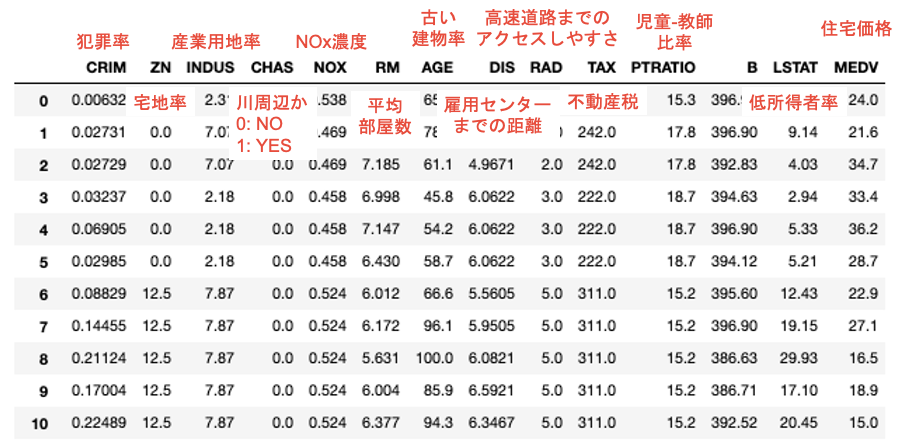

## データセットの確認

まずはこのBoston house-price dataの内容を確認して，典型的な機械学習にはどのようなデータが必要になるのかを確認しよう．

「回帰」タスクとは，あるn次元実数値ベクトルxにたいして実数値yを予測するというタスクである．
Boston house-price dataで想定されるタスクは，
n=13次元の実数ベクトルによって各住宅の特徴を表現しその価格を予測する，というタスクである．

In [ ]:
boston.data # dataという属性に13次元のベクトルが格納されている．Colabでは各セルの最後の行の出力が自動的に出力される．

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
# 13次元のベクトルは行ベクトル（横長のベクトル）で表現されており，それが506個積み重なることによって行列として表現されている（計画行列とも呼ぶ）．つまり，506行 x 13列の行列となっている．
# この行列はnumpy.ndarrayというクラスのオブジェクトとして表現されており，shapeという属性には行と列の値が格納されている．
boston.data.shape

(506, 13)

In [ ]:
boston.data[0] # 試しに1行目のベクトルを取り出してみる．13次元のベクトルであることが確認できる．

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [ ]:
boston.data[1] # 試しに2行目のベクトルも取り出してみる

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [ ]:
# 各住宅の価格はtarget属性に格納されている．これは506次元のベクトルで表現され，Python中ではnumpy.ndarrayというクラスのオブジェクトとして表現されている．
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
boston.target[0] # 試しに1次元目の値を取り出してみる．

24.0

In [ ]:
boston.target[1] # 試しに2次元目の値も取り出してみる．

21.6

In [ ]:
# 計画行列の先頭の406行分のベクトルとそれに対応するラベルを訓練データ，残りをテストデータとして用いることにする
train_num = 406
train_X, test_X = boston.data[:train_num], boston.data[train_num:]
train_y, test_y = boston.target[:train_num], boston.target[train_num:]

## 回帰タスクの確認

直前のセルで行ったように，機械学習では，ほぼ必ず訓練データ (train_X, train_y) とテストデータ (test_X, test_y) のそれぞれを用意して，
テストデータはあたかも未知のデータであるかのように扱う．
訓練データによってどれくらいの精度が達成できたかを評価するためには，かならずこのテストデータを用い，訓練データを評価に用いてはいけない．
他方，テストデータは機械学習モデルの学習には決して使ってはいけない．

もう少し形式的に説明するのであれば，以下のような擬似コードが役に立つかもしれない．

```
trained_model = train(train_X, train_y)
predicted_y   = predict(trained_model, test_X)
performance   = evaluation(test_y, predicted_y)
```

上記の擬似コードの意味することは以下のことである：
- train_Xとtrain_yを使って学習済みモデルtrained_modelを得る
- 学習済みモデルtrained_modelを使ってtest_Xの各行（各ベクトル）について予測値predicted_yを求める
- 予測値predicted_yが実測値test_Yにどれくらい近いかを評価する

繰り返すが，上記において行ってはいけないのは，機械学習モデルを学習するときにtest_Xやtest_yを使うことや，評価の際にtrain_Xやtrain_yを使うことである．

## 線形回帰モデル

線形回帰モデルは非常にシンプルな回帰モデルである．一言で言えば，与えられたベクトルの各次元の値に適切な値を掛けて，それらの和によって値を予測するモデルである．単純であるが解釈性（どのように予測結果が得られたのかの理解が容易であるか）は高い．

あるn次元のベクトル${\mathbf x}$に対して，線形回帰モデルは以下の式で予測値$\hat{y}$を求める．

$$\hat{y} = {\mathbf w}^T {\mathbf x} + b$$

${\mathbf w}$はn次元の実数値ベクトル，$b$は実数である．
${\mathbf w}^T {\mathbf x}$は両ベクトルの内積を表している．

別の書き方をすると以下のようになる．

$$\hat{y} = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b$$

ただし，$w_i$は${\mathbf w}$の$i$次元目の値，$x_i$は${\mathbf x}$の$i$次元目の値である．要するに，「与えられたベクトルの各次元の値に適切な値を掛けて，それらの和によって値を予測するモデル」なのだ．

おそらく，一番の疑問は${\mathbf w}$や$b$がなんであるかであろう．これらはパラメータと呼ばれ，「学習」によって適切に決定される変数である．つまり，機械学習において「学習」とは，訓練データを用いてパラメータを適切に設定する，ということを指すのである．線形回帰モデルにおいて，${\mathbf w}$と$b$が決まれば，任意のn次元ベクトルに対して予測値を求めることができるようになる．


In [ ]:
from sklearn.linear_model import LinearRegression # scikit-learnから線形回帰モデルLinearRegressionをimportする
from sklearn.metrics import mean_squared_error # 性能指標としてMean Squared Error (MSE; 平均二乗誤差)をimportする

model = LinearRegression() # 線形回帰モデルを初期化する
trained_model = model.fit(train_X, train_y) # 訓練データ train_X, train_y を与えて，モデルを学習（＝パラメータを決定）する
predicted_y = trained_model.predict(test_X) # テストデータの事例 test_X のそれぞれに対して，予測値を計算する．
performance = mean_squared_error(test_y, predicted_y) # 予測値と実測値の差をMSEで求める．小さい方が正確な予測だと言える．
print("MSE", performance) # MSEを出力

MSE 33.54828291225656


In [ ]:
# 個別の事例についてどのように予測が行われるか確認しよう
print("Instance #1\n", test_X[0]) # テストデータの1つ目の事例を出力
print("Prediction #1", predicted_y[0]) # テストデータの1つ目の事例に対する予測値を出力
print("Coefficient\n", trained_model.coef_) # 学習済み線形回帰モデルのパラメータw（係数，つまり，coefficientとも呼ばれる）を出力
print("Intercept", trained_model.intercept_) # 学習済み線形回帰モデルのパラメータb（切片，つまり，interceptとも呼ばれる）を出力

# 先述の線形回帰モデルの説明通り予測が行われているか確認しよう
manual_pred = 0
for i in range(13):
  manual_pred += test_X[0][i] * trained_model.coef_[i] # x, wの両ベクトルの同じ次元同士をかけ，すべて足しあわせる
manual_pred += trained_model.intercept_ # 最後にbを足す
print("Manual Prediction #1", manual_pred) # これが予測値と一致するはず

Instance #1
 [2.07162e+01 0.00000e+00 1.81000e+01 0.00000e+00 6.59000e-01 4.13800e+00
 1.00000e+02 1.17810e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.70220e+02
 2.33400e+01]
Prediction #1 6.787739989408138
Coefficient
 [-1.91271945e-01  4.40546273e-02  5.20506841e-02  1.89168396e+00
 -1.49400807e+01  4.75726400e+00  2.70270874e-03 -1.30022119e+00
  4.58902714e-01 -1.55840407e-02 -8.11094905e-01 -2.16355137e-03
 -5.32320487e-01]
Intercept 30.20429814421056
Manual Prediction #1 6.787739989408138


## 比較の重要性

さて，この線形回帰モデルはどれほど素晴らしい予測ができていたのであろうか．MSEは約33.5である．この値は高いのだろうか，低いのであろうか．実際の卒業研究でも同じことが言えるが，「評価は比較がなければその結果に対して十分な考察を与えることができない」のである．

比較を行ってみよう．1つ目の比較方法は経験を用いない場合の予測である．例えば，予測値を単に20と予測する場合と比較しよう．どんな方法であっても，ここまで当てずっぽうの方法よりかは良い結果が得られるであろう．得られていなければ，何かバグがあると考えるのが妥当である．

2つ目の比較方法は，Gradient Boosted Decision Tree (GBDT)と呼ばれる，より複雑で，実務上もよく用いられている機械学習モデルである．このモデルは線形回帰モデルよりも高い精度の予測を行うことが期待される．

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# 比較手法 1
predicted_y = [20] * len(test_X) # [20, 20, ..., 20] というように，全テストデータの事例に対して20という値を予測したとする
performance = mean_squared_error(test_y, predicted_y) # 予測値と実測値の差をMSEで求める．小さい方が正確な予測だと言える．
print("MSE (Naive)", performance) # MSEを出力

# 比較手法 2
model = GradientBoostingRegressor() # GBDTモデルを初期化する
trained_model = model.fit(train_X, train_y) # 訓練データ train_X, train_y を与えて，モデルを学習する
predicted_y = trained_model.predict(test_X) # テストデータの事例 test_X のそれぞれに対して，予測値を計算する．
performance = mean_squared_error(test_y, predicted_y) # 予測値と実測値の差をMSEで求める．小さい方が正確な予測だと言える．
print("MSE (GBDT)", performance) # MSEを出力

MSE (Naive) 39.966300000000004
MSE (GBDT) 15.95739345567029


## 比較のまとめ

3つの手法を比較し以下のような結果が得られた：

- 単純予測： 39.97
- 線形回帰： 33.55
- GBDT： 15.96

線形回帰は，経験を用いない単純予測よりも性能指標（今回はMSE）が小さくなっていることから，定義上，経験（訓練データ）によって学習を行っているといえる．一方で，より複雑なモデルであるGBDTと比較すると，線形回帰による予測結果は単純予測により近く，あまり良い予測ができているとは言いがたい，住宅の価格を予測するような問題に対しては，線形回帰のような単純な機械学習モデルでは良い結果が得られないことがわかった．

上記のような考察を行うためにはやはり比較が必ず必要となることがわかるであろう．また，用いている手法の特性についても十分な理解が必要となる．